In [1]:
# Importing the required modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, silhouette_score

### Creating the dataframe for the USArrests data file

In [2]:
# Read the csv file from the task folder
df = pd.read_csv('USArrests.csv', index_col = 'City')

In [3]:
# Printing a few header records
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
# Printing the shape of the data
# Data for 50 states with four features columns
print(df.shape)

(50, 4)


In [5]:
# Printing the count of the records and features
print(f'Number of US States in data {df.shape[0]}; Number of Features {df.shape[1]}')

Number of US States in data 50; Number of Features 4


In [6]:
# Displaying some stats on our data
# Kowning our data in bit more detail. The functon gives us min, max, mean and other stats
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Getting to know more about the data including the datatype and whether there are any null values in the dataset
# No missing values found
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Histograph analysis:
1. Murders - The highest murders are 17.5 and happened in 2 states. About 9 states have got murders between 5-7.5
2. Assault - Highest assault have been registered beetween 300-350 and they were recorded in 2 states. About 9 states had assaults between 100-150
3. UrbanPop - About 90% of population living in urban areas in 4 states. In 9 states about 65% population live in urban areas
4 Rapes - the highest number of rapes were registered in 2 states. In about 10 states, the rape cases were between 15-20

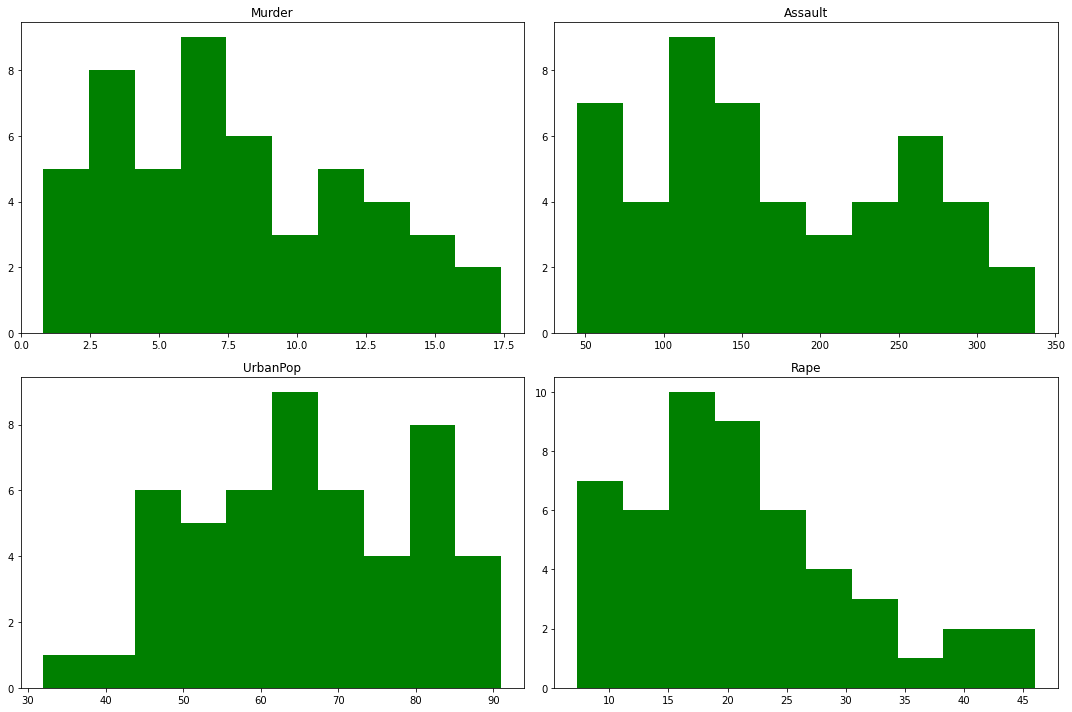

In [8]:
# Plot the histogram for the four features
hists = df.hist(color='green', grid=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [9]:
# Checking the data for any missing values
missing = df.isnull().sum()
missing_df = pd.DataFrame(missing, columns=['missing'])
missing_df

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


Heatmap Analysis:
1. Assualts have strong, positive correlation with murders and rapes
2. UrbanPop has moderate to strong positive correlation with rapes
2. Murders have got strong positive relation with rapes

C:\Users\mmahida\AppData\Local\Temp\ipykernel_55660\1560734001.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


<AxesSubplot:>

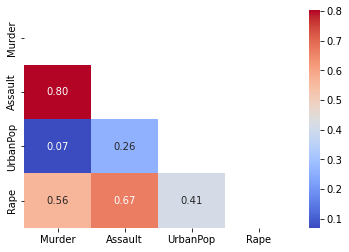

In [10]:
# Storign the names of the states
states = df.index

# Defining correlation for the dataframe and storing th labels for using later
corr_df = df.corr()
labels =corr_df.columns
#correlations = df.corr()
#correlations

# Plotting the heatmap
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm", annot=True, fmt=".2f")

Notes on the Heatmap:
>> The above heatmap suggests that there is a strong positive relation between assault and murder
>> Also there is a moderate positive relation between murder and rape as well
>> However, Urban population has a weak positive relation with murder and assuaut but a moderate relation with rape case

# Preparing in-depth PCA analysis. Explore as much as you can, motivate the
# pre-processing steps you take, and interpret the outcomes of any analyses

In [38]:
# Setting the print options
np.set_printoptions(precision=2)

# Preparign the PCA object and fitting-transforming it
X = df.values
#.squeeze()
pca = PCA()
X_trans = pca.fit_transform(X)
#print(X_trans)

# Defining the pca dataframe
df_pca = pd.DataFrame(X_trans, columns=labels)
# Display a few head records
df_pca.head()


,Murder,Assault,UrbanPop,Rape
0,64.802,11.448,-2.495,2.408
1,92.827,17.983,20.127,-4.094
2,124.068,-8.830,-1.687,-4.354
3,18.340,16.704,0.210,-0.521
4,107.423,-22.520,6.746,-2.812


In [12]:
# View pca components
pca.components_[0:4, :]

array([[ 0.04,  1.  ,  0.05,  0.08],
       [ 0.04,  0.06, -0.98, -0.2 ],
       [ 0.08, -0.07, -0.2 ,  0.97],
       [ 0.99, -0.04,  0.06, -0.07]])

In [14]:
# Getting to know your pca DataFrame including min, max, mean and std
df_pca.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.254108e-14,5.204726e-15,8.215650e-15,-1.547651e-15
std,8.373240e+01,1.421240e+01,6.489426e+00,2.482790e+00
min,-1.274956e+02,-2.429121e+01,-1.747002e+01,-4.353685e+00
25%,-6.245852e+01,-1.170149e+01,-3.154335e+00,-1.913169e+00
50%,-1.098298e+01,-2.100031e+00,-3.976963e-01,-3.491066e-01
75%,7.881348e+01,9.500174e+00,3.272465e+00,1.250730e+00
max,1.652444e+02,3.109662e+01,2.012657e+01,7.343673e+00


### Plotting the eighenvectors on PCA1 and PCA2. This is before the prerocessing is carried out

In [17]:
# Function that plots the eughenvectors on PCA1 and PCA2
# This is on a non-scaled data
def biplot(score,coeff,labels=None,points=None):
    # Preparing the variables for plot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    # Settinf the fig size and plotting the scatter graph
    fig, ax = plt.subplots(figsize = (15, 15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)
    # Adding details to the graph
    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))
    # Plotting eighenvectors
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    # Labling the graph
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()


4


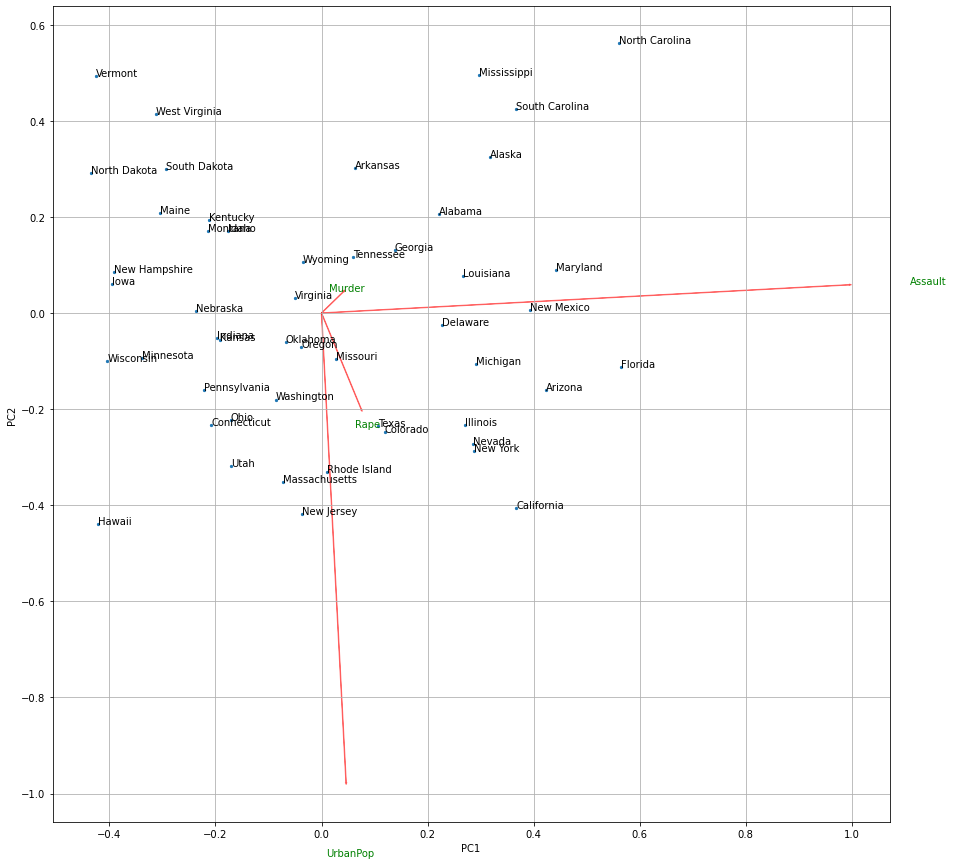

In [18]:
# Calling the custom function for 2 PCA components and passing all the labels with States
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(states))
plt.show()

Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. From this biplot, we see that Assualt is the most important feature for PC1 and UrbanPop is the most important feature for PC2 as the arrows to each of these dominate the biplot.

This information can also be quantified as follows:

In [19]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )
#pc3 = abs( pca.components_[2] )


feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
#feat_df["PC3 Importance"] = pc3

feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


We see that the Assault has by far the highest importance in the first principle component, while UrbanPop is more important for the second component. The other features Murder nd Rape are relatively less important here.

If we go back to the original data, we know that UrbanPop is given in percentage where as the other stats are given in their respective counts. It is possible that because of this, it could have impacted our result. It is best to Standardize the data and view the same results again.


In [20]:
# Scaling the data using the Standardization
X_std = StandardScaler().fit_transform(X)

# Applying the PCA and transforming the data
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

# Defining a dataframe for the PCA
df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


4


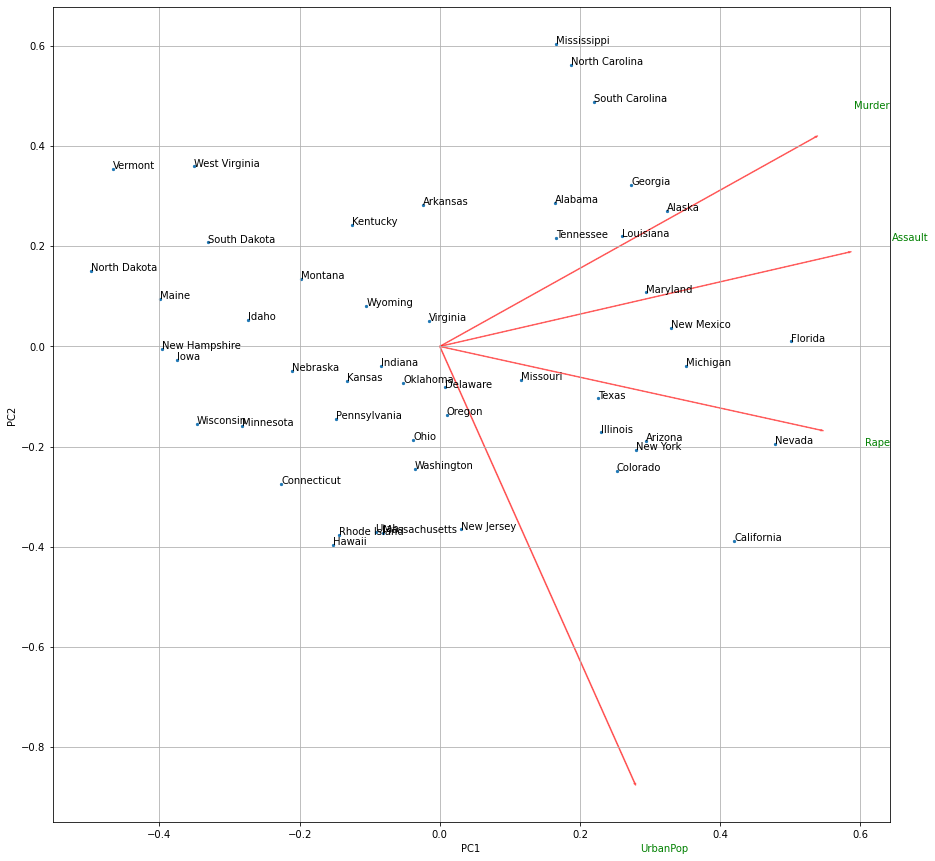

In [21]:
# Calling the custom function for 2 PCA components and passing all the labels with States
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

In [ ]:
The above biplot shows that 50 states mapped according to the 2 principal components. The vectors of the PCA for 4 variables are also plotted.

The large positive scores on the first component, such as California, Nevada and Florida, have high crime rates, while states like North Dakota, with negative scores on the first component, have low crime rates.
Mississippi also has a high score on the second component.
States close to zero on both components, such as Indiana, have approximately average levels of both crime and urbanization.

We see that the standardised data results in more variables being utilised to explain the variance, as the large numbers no longer dominate it. We also see that the the different features cluster together in groups.

In [39]:
# Displaying the pca dataframe to validate the results from Biplot
pca_df

,0,1
City,,
Alabama,0.986,1.133
Alaska,1.950,1.073
Arizona,1.763,-0.746
Arkansas,-0.141,1.120
California,2.524,-1.543
Colorado,1.515,-0.988
Connecticut,-1.359,-1.089
Delaware,0.048,-0.325
Florida,3.013,0.039


In [22]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


Inspecting the feature importance now, we see that Murder, Assualt and Rape contribute fairly evenly to PCA1. PCA2 however, is dominated by UrbanPop feature.

Text(0.5, 1.0, 'Cumulative Explained Variance')

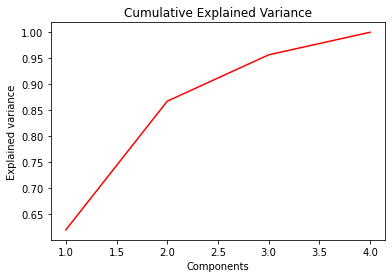

In [23]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

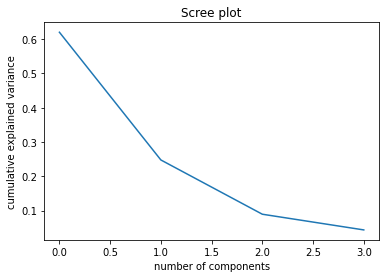

In [24]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 2 principal components together explain around 85%-90% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. We began with 4 variables and now we have 2 variables explaining most of the variability.

In [25]:
# DataFrame to validate the results
pca_df = pd.DataFrame(X_std_trans[:,0:2], index = df.index)
pca_df.head()

,0,1
City,,
Alabama,0.986,1.133
Alaska,1.950,1.073
Arizona,1.763,-0.746
Arkansas,-0.141,1.120
California,2.524,-1.543


### Hierarchical clustering

You are also required to do an application of two clustering techniques and an analysis of the clusters they generate. Try and see if you can find anything common within each cluster that has been found.

I have used Agglomerative clustering the KNN clustering for these task as shown below.

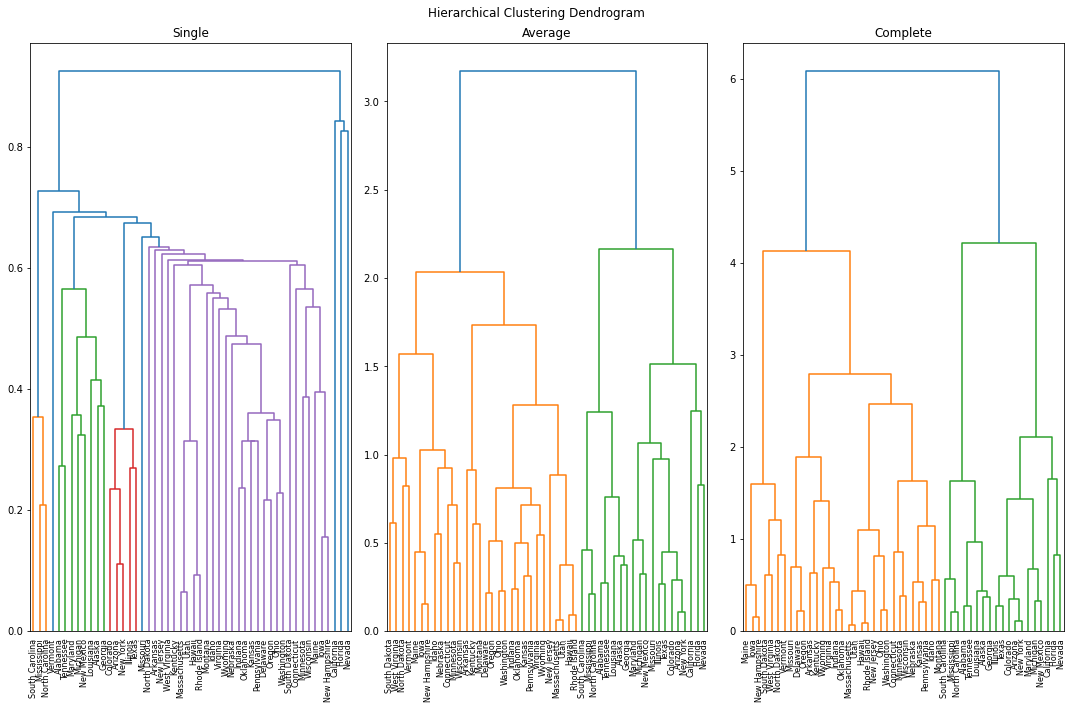

In [26]:
# Defining the agglomerative object and fitting it
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

# Plotting the dendrograms for single, average and complete methods
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))
#fig, ax = plt.subplots(figsize = (15, 15)) 
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.tight_layout()
plt.show()

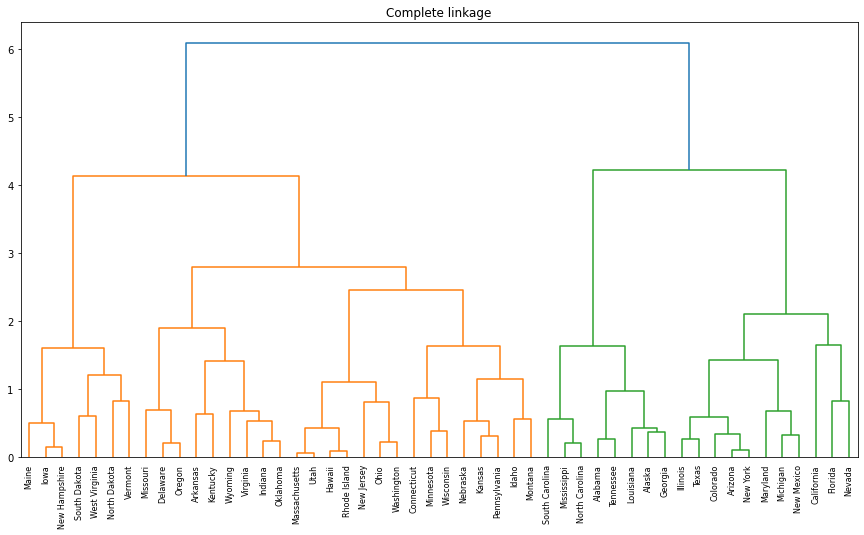

In [27]:
#Plotting a larger dendrogram for analysis
# The dendrogram below shows that we should take 2 clusters as shown by the longest vertical line without any horizontal intersection
fig, ax = plt.subplots(figsize = (15, 8)) 
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### KNN Clustering
I am going to use 2 clusters as derived in the agglomerative clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


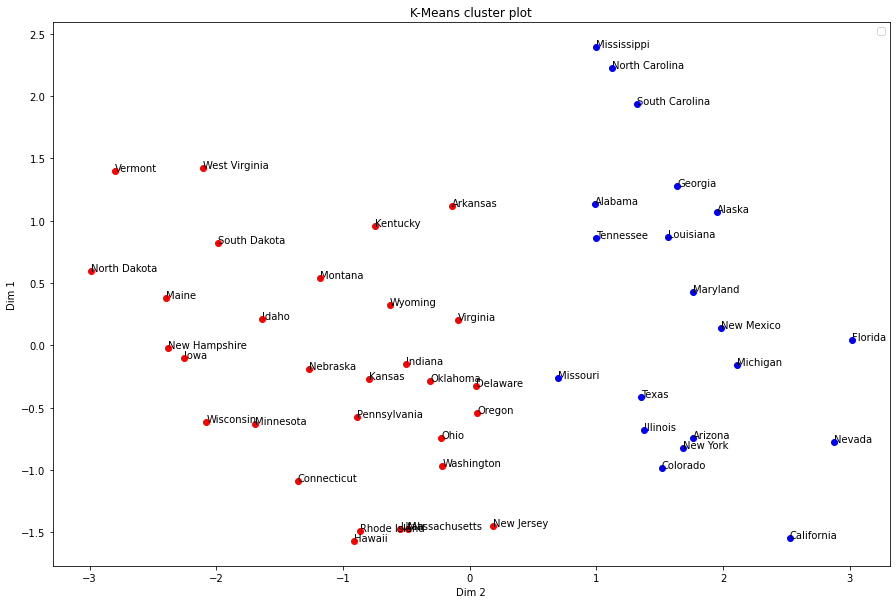

In [28]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots(figsize = (15, 10))
colours = 'rbgy'
# PLot the scatters
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 
# States
for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
# Set labels
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

### Common theme between the clusters:
>> The clusters are highlighted in Red and Blue colours above in the graph
>> We can clearly see that the cluster members have more similarities withoin the members states compared to the ones outside the clusters. 
>> e.g. Indiana and Kansas have more similarities across all the 4 features compared to that of Lousiana
>> Similarly, the members states from different groups are more different from that of from sam egroup

In [41]:
# Groups - translate to readable names
clusters = pd.DataFrame()
#print(cluster_labels)

# Creating group indices and groups
group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]

group0 = np.array(states)[group0_indices]
group1 = np.array(states)[group1_indices]

# Print the groups members
print("Group 0: {}\n\n".format(group0))
print("Group 1: {}\n\n".format(group1))

Group 0: ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Group 1: ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']




In [30]:
# Printing the silhoutte score
print(silhouette_score(df_pca.values,metric='euclidean', labels = cluster_labels))

0.540674243902767


The file is available on Github at this location: https://github.com/MaitriMZ/USArrests